<a href="https://colab.research.google.com/github/laure-m/ProxyFaces_Course/blob/main/proxyFaces_YOLOv8_Det_Seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROXY FACES UCLA AUD SPRING TECH SEMINAR 
#YOLOv8 Detection + Segmentation Notebook
This notebook will walkthrough all the steps for performing YOLOv8 object detections and segmentations on images while in Google Colab. We will be using yolov8 for this tutorial.

***INITIAL SETUP***

Step 01: Install Required Library, Ultralytics Library

In [ ]:
from IPython.display import Image

In [ ]:
!pip install ultralytics==8.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144573 sha256=f5247f69f892a97a21085f5fa4b6c06f13679ed3ea8aaa6ecaabaa66024e952f
  Stored in directory: /root/.cache/pip/wheels/23/cf/80/f3efa822e6ab23277902ee9165fe772eeb1dfb8014f359020a
Success

Step 02: Check whether or not GPU is available

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.__version__

'2.0.0+cu118'

Step 03: Take Picture (or Upload)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


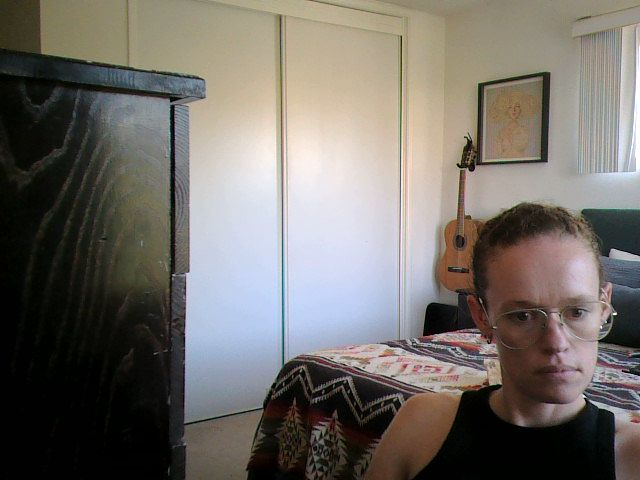

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

***OBJECT DETECTION*** 

In [ ]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/photo.jpg' 

2023-04-15 22:17:35.664757: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 22:17:36.995386: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
100% 21.5M/21.5M [00:00<00:00, 163MB/s]

Fusing layers... 
YOLOv8s summary: 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
image 1/1 /content/photo.jpg: 480x640 1 person, 1 couch, 2 beds, 57.4ms
Speed: 0.5ms pre-process, 57.4ms inference, 30.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


Display Output Image

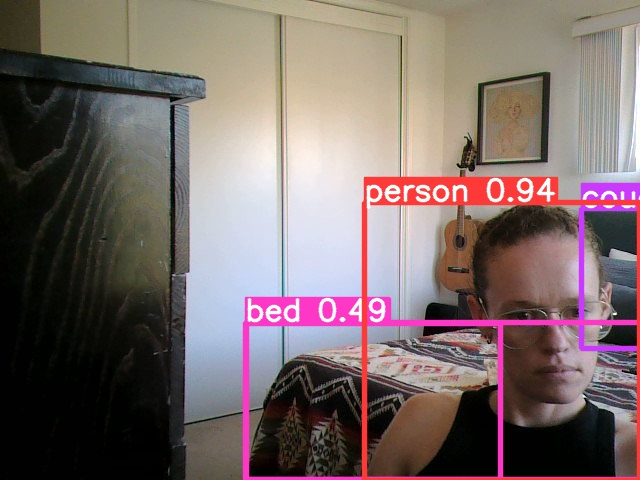

In [ ]:
Image('/content/runs/detect/predict/photo.jpg')

***SEGMENTATION*** 

In [48]:
!yolo task=segment mode=predict model=yolov8s-seg.pt source='/content/photo.jpg' 

2023-04-15 22:57:09.152932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 22:57:10.112850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
100% 22.8M/22.8M [00:00<00:00, 169MB/s]

Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs
image 1/1 /content/photo.jpg: 480x640 1 person, 1 chair, 1 couch, 1 book, 74.0ms
Speed: 0.5ms pre-process, 74.0ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


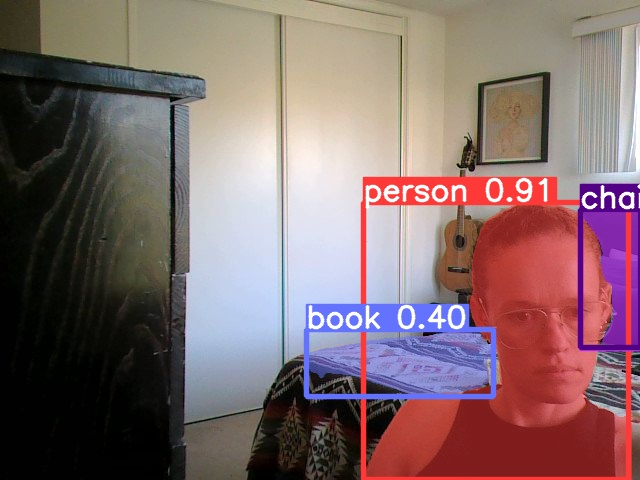

In [49]:
Image('/content/runs/segment/predict/photo.jpg')